In [1]:
# Importing pandas librar 
import pandas as pd
# Get the train/test split package from sklearn for spliting the dataset to train and test set 
from sklearn.model_selection import train_test_split
# Importing the numpy library 
import numpy as np
import matplotlib.pyplot as plt
#importing the natural language toolkit
import nltk 
import random 
from nltk.tokenize import word_tokenize
nltk.download('punkt') 
nltk.download('stopwords')  
nltk.download('wordnet')
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Importing the necessary libraries
import csv
import urllib.request as urllib2
import matplotlib.pyplot as plt
from nltk import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
# import data from google drive
data = pd.read_csv('https://raw.githubusercontent.com/cacoderquan/Sentiment-Analysis-on-the-Rotten-Tomatoes-movie-review-dataset/master/train.tsv', sep='\t')

# Check the head of the dataframe
data.head(10)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


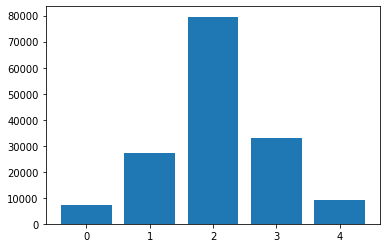

In [3]:
raw_data = data.Sentiment.value_counts()
plt.bar(raw_data.index.values, height=raw_data);

In [4]:
#sampling the dataframe and reseting the index
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,34819,1638,smell the grease on the plot,3
1,45466,2210,It 's never dull and always looks good .,4
2,18860,827,Begley,2
3,144673,7852,"Jackson , who also served as executive producer ,",2
4,152674,8331,the chaotic horror,1


In [5]:
# creating train and test set(training = 70% and testing = 30%)
X_train, X_test, Y_train, Y_test = train_test_split(data ['Phrase'], data ['Sentiment'], test_size=0.3, random_state=2003)
documents=[]
#converting training and testing sets to NumPy arrays
X_train = np.array(X_train.values.tolist())
Y_train = np.array(Y_train.values.tolist())
X_test = np.array(X_test.values.tolist())
Y_test = np.array(Y_test.values.tolist())

#word tokenize training and testing sets and appending to a list
for i in range(len(X_train)):
  documents.append([list(word_tokenize(X_train[i])), Y_train[i]]) 

for i in range(len(X_test)):
  documents.append([list(word_tokenize(X_test[i])), Y_test[i]]) 

documents[0]

[['therapy-dependent'], 2]

In [0]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer, PorterStemmer, LancasterStemmer 
porter = PorterStemmer() 
lancaster=LancasterStemmer() 
wordnet_lemmatizer = WordNetLemmatizer() 
stopwords_en = stopwords.words("english") 
punctuations="?:!.,;'\"-()"
#parameters to adjust to see the impact on outcome 
remove_stopwords = True
useStemming = False
useLemma = False
removePuncs = True


In [7]:
for l in range(len(documents)):
  label = documents[l][1]
  tmpReview = [] 
  for w in documents[l][0]:
    newWord = w
    if remove_stopwords and (w in stopwords_en):
      continue
    if removePuncs and (w in punctuations):
      continue
    if useStemming:
      #if useStemming is True : use any one of the stemmer
      #newWord = porter.stem(newWord) #User porter stemmer 
      newWord = lancaster.stem(newWord) #Use Lancaster stemmer 
    if useLemma: 
      newWord = wordnet_lemmatizer.lemmatize(newWord) 
    tmpReview.append(newWord) 
  documents[l] = (tmpReview, label) 
  documents[l] = (' '.join(tmpReview), label) 

print(documents[0])

('therapy-dependent', 2)


In [8]:
# create a new df using documents list with text and sentiment as columns
df = pd.DataFrame(documents, columns=['text', 'sentiment']) 
#creating training(70%) and testing(30%) sets
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],  df['sentiment'], test_size=0.3, random_state=2003)
df.head()

,text,sentiment
0,therapy-dependent,2
1,It unfolds predictably,1
2,encounter,2
3,retains extraordinary faith ability images,3
4,funny stuff movie,2


In [9]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from keras.utils import to_categorical

#performing Tfidf Vectorizing on the input text which are the feature to the model
vectorizer = TfidfVectorizer(max_features = 2000,ngram_range=(2, 2)) 
X = vectorizer.fit_transform(df["text"]) 
Y = df['sentiment'] 
 
X_train = vectorizer.transform(X_train).toarray()
Y_train = Y_train 
X_test = vectorizer.transform(X_test).toarray()
Y_test = Y_test

Using TensorFlow backend.


In [0]:
#importing required keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Embedding
from keras import backend
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.layers import SpatialDropout1D
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [0]:
#defining recall function
def recall_m(y_true, y_pred):
    true_pos = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    actual_pos = backend.sum(backend.round(backend.clip(y_true, 0, 1)))
    recall = true_pos / (actual_pos + backend.epsilon())
    return recall

#defining precision function
def precision_m(y_true, y_pred):
    true_pos = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)))
    predicted_pos = backend.sum(backend.round(backend.clip(y_pred, 0, 1)))
    precision = true_pos / (predicted_pos + backend.epsilon())
    return precision

#defining F1 score function
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+backend.epsilon()))

In [0]:
#defining parameters
batch_size = 64
num_classes = 5
epochs = 100
#converting the training and testing labels into binary class matrix
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

In [13]:
#model defenition
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, strides=2, activation='relu', input_shape=(2000,1)))
model.add(Conv1D(128, kernel_size=3, strides=2, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(rate = 0.50))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 999, 64)           256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 499, 128)          24704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 499, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 499, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 63872)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16351488  


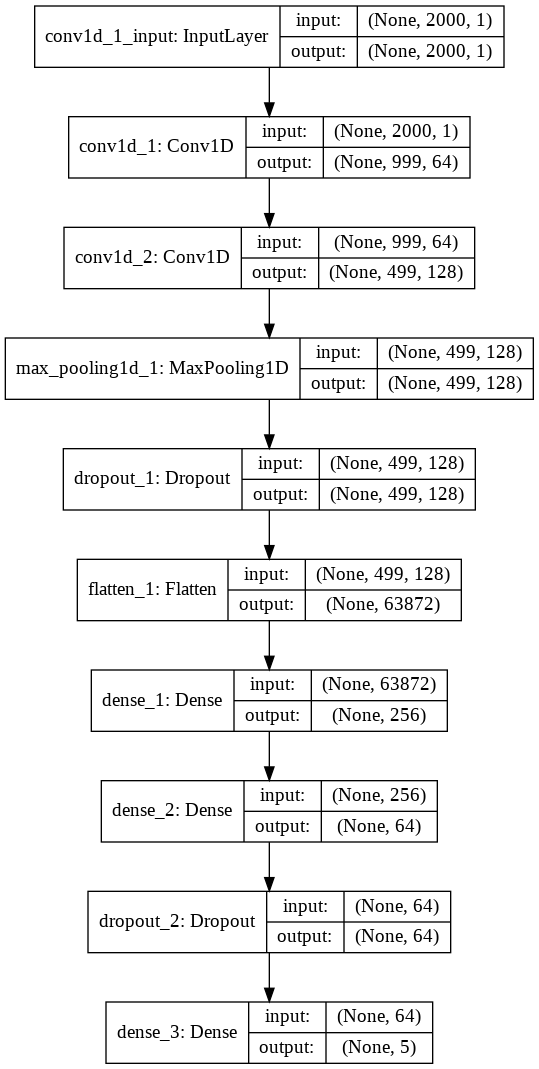

In [14]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy',f1_m,precision_m, recall_m])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





109242/109242 [==============================] - 36s 330us/step - loss: 1.2727 - acc: 0.5169 - f1_m: 0.3558 - precision_m: 0.5321 - recall_m: 0.2803
Epoch 2/100
109242/109242 [==============================] - 23s 209us/step - loss: 1.2259 - acc: 0.5305 - f1_m: 0.4484 - precision_m: 0.5536 - recall_m: 0.3817
Epoch 3/100
109242/109242 [==============================] - 23s 209us/step - loss: 1.2106 - acc: 0.5358 - f1_m: 0.4895 - precision_m: 0.5578 - recall_m: 0.4381
Epoch 4/100
109242/109242 [==============================] - 23s 210us/step - loss: 1.2033 - acc: 0.5381 - f1_m: 0.5062 - precision_m: 0.5567 - recall_m: 0.4652
Epoch 5/100
109242/109242 [==============================] - 23s 210us/step - loss: 1.1967 - acc: 0.5398 - f1_m: 0.5157 - precision_m: 0.5593 - recall_m: 0.4799
Epoch 6/100
109242/109242 [==============================] - 23s 210us/step - loss: 1.1931 - 

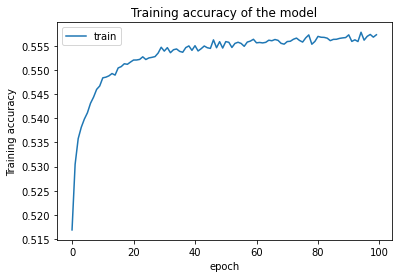

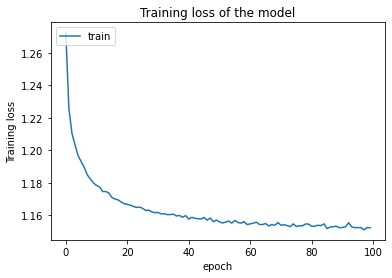

In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
history = model.fit(X_train, Y_train,
          batch_size=64,
          epochs=100)

#Training accuracy plot of the model
plt.plot(history.history['acc'])
plt.title('Training accuracy of the model')
plt.ylabel('Training accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#Training loss plot of the model
plt.plot(history.history['loss'])
plt.title('Training loss of the model')
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [17]:
#evaluating the model
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('F1 score:', score[2])
print('Precision:',score[3])
print('Recall:',score[4])

Test loss: 1.24617699911402
Test accuracy: 0.5376350976120295
F1 score: 0.5288185111643936
Precision: 0.5509530810779384
Recall: 0.5090349865436371


In [0]:
#saving the model
model.save("1114334_1dconv_reg.h5")

In [0]:
#code for loading the saved model
from keras.models import load_model

# loading model from disk
model_load = load_model('1114334_1dconv_reg.h5', custom_objects={'f1_m': f1_m, 'precision_m': precision_m, 'recall_m': recall_m})